In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skrf as rf
from skrf import Network
from skrf.data import ring_slot_meas
from skrf import plotting

<hr>
Modified   By   Reason <br>
16-Jan-22  CBL  Original, https://scikit-rf.readthedocs.io/en/latest/tutorials/Circuit.html <br>
design the filter on the webpage: https://rf-tools.com/lc-filter/
<hr>

In [3]:
freq = rf.Frequency(start=0.1, stop=10, unit='GHz', npoints=1001)
tl_media = rf.DefinedGammaZ0(freq, z0=50, gamma=1j*freq.w/rf.c)
C1 = tl_media.capacitor(3.222e-12, name='C1')
C2 = tl_media.capacitor(82.25e-15, name='C2')
C3 = tl_media.capacitor(3.222e-12, name='C3')
L2 = tl_media.inductor(8.893e-9, name='L2')
RL = tl_media.resistor(50, name='RL')
gnd = rf.Circuit.Ground(freq, name='gnd')
port1 = rf.Circuit.Port(freq, name='port1', z0=50)
port2 = rf.Circuit.Port(freq, name='port2', z0=50)

cnx = [
    [(port1, 0), (C1, 0), (L2, 0), (C2, 0)],
    [(L2, 1), (C2, 1), (C3, 0), (port2, 0)],
    [(gnd, 0), (C1, 1), (C3, 1)],
]
cir = rf.Circuit(cnx)
ntw = cir.network

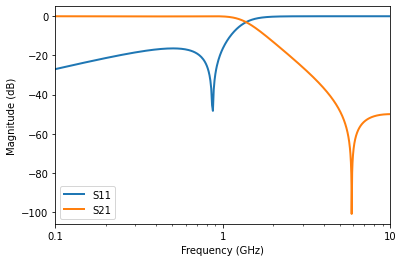

In [4]:
ntw.plot_s_db(m=0, n=0, lw=2, logx=True)
ntw.plot_s_db(m=1, n=0, lw=2, logx=True)

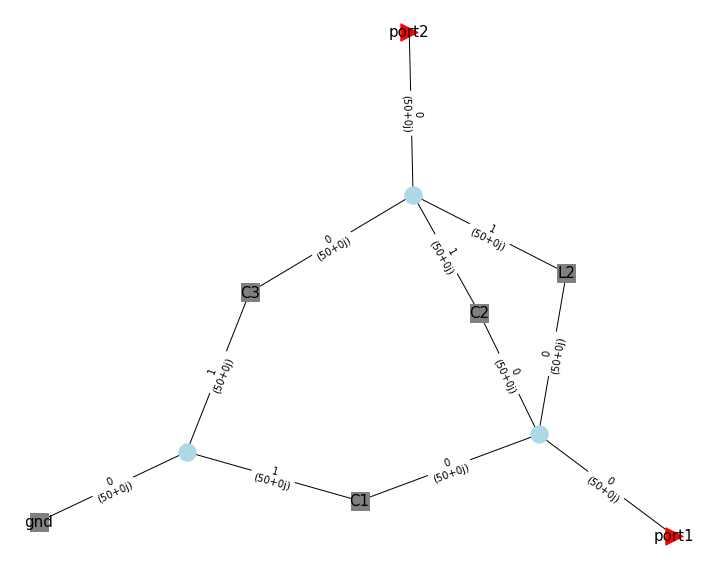

In [5]:
cir.plot_graph(network_labels=True, network_fontsize=15,
               port_labels=True, port_fontsize=15,
              edge_labels=True, edge_fontsize=10)